In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import datetime 
import os.path
from os import path
import seaborn as sns
import scipy
from scipy import signal

In [6]:
df_master = pd.DataFrame()

In [7]:
## 1, -- KDP_nu
KDP_nu_name=["CIR40" ,"CIR50"]
KDP_nu=[1,1.25]

## 2,  --  KDP_w_sat_1  -- -
KDP_w_sat_1_name=["0_33" ,"0_66" ,"1_00"]
KDP_w_sat_1=[0.33, 0.66 ,1.00]

## 3,  --  KDP_w_sat_2  -- -
KDP_w_sat_2_name=["ImmunEscp_Jul" ,"ImmunEscp_Sep", "ImmunEscp_Nov"]
KDP_w_sat_2=[380, 442 ,503]

## 4,  --  KDP_g_1  -- -
KDP_g_1_name=["0_33", "0_66" ,"1_00"]
KDP_g_1=[0.33, 0.66, 1.00]

## 5,  --  KDP_g_2  -- -
KDP_g_2_name=["ABW150Days" ,"ABW180Days"]
KDP_g_2=[150 ,180]

## 6,  --  KDP_c_p  -- -
KDP_c_p_name=["Vaccine_PresentRate", "Vaccine_BestWeekAvg", "Vaccine_TwicePresent"]
KDP_c_p=[1 ,1.5, 2]

KDP_lambda_name=["SD_RA","SD_RAR","SD_RARF"]
KDP_lambda=[0,0.1,0.2]

In [2]:
2*3*3*3*2*1*3


324

In [8]:
%time
df_master = pd.DataFrame()
dateOfPeak = []
dayOfPeak = []
numAtPeak = []
vaccRate = []
numRead = 0
for i in range(len(KDP_nu)):
        for j in range(len(KDP_w_sat_1)):
            for k in range(len(KDP_w_sat_2)):
                for l in range(len(KDP_g_1_name)):
                    for m in range(len(KDP_g_2)):
                        for n in range(len(KDP_c_p)):
                            for o in range(len(KDP_lambda)):
                                if(path.exists(KDP_nu_name[i] + "_" + KDP_w_sat_1_name[j] + "_" + KDP_w_sat_2_name[k] + "_" + \
                                            KDP_g_1_name[l] + "_" + KDP_g_2_name[m] + "_" + KDP_c_p_name[n] + "_" + \
                                            KDP_lambda_name[o]+"/PopulationData/CovidPopulation.data")):
                                        df_temp = pd.read_csv(KDP_nu_name[i] + "_" + KDP_w_sat_1_name[j] + "_" + KDP_w_sat_2_name[k] + "_" + \
                                                KDP_g_1_name[l] + "_" + KDP_g_2_name[m] + "_" + KDP_c_p_name[n] + "_" + \
                                                KDP_lambda_name[o]+"/PopulationData/CovidPopulation.data", delim_whitespace=True, header=1)

                                        dIdt = np.zeros(len(df_temp))
                                        dIdt[0] = df_temp.iloc[1]['Total'] - df_temp.iloc[0]['Total'] 
                                        dIdt[len(df_temp)-1] = df_temp.iloc[len(df_temp)-1]['Total'] - df_temp.iloc[len(df_temp)-2]['Total'] 
                                        for d in range(1,len(df_temp)-1):
                                            dIdt[d] = (df_temp.iloc[d+1]['Total'] - df_temp.iloc[d-1]['Total'])/2


                                        ExptId = [KDP_nu_name[i] + "_" + KDP_w_sat_1_name[j] + "_" + KDP_w_sat_2_name[k] + "_" + \
                                                KDP_g_1_name[l] + "_" + KDP_g_2_name[m] + "_" + KDP_c_p_name[n] + "_" + \
                                                KDP_lambda_name[o] for a in range(len(df_temp))]
                                        numRead+=1

                                        VaccineRt = [str(KDP_c_p_name[n]) for vx in range (len(df_temp))]
                                        CIR = [str(KDP_nu_name[i]) for cir in range (len(df_temp))]
                                        SD = [str(KDP_lambda_name[o]) for sd in range(len(df_temp))]

                                        df_temp['ID'] = ExptId
                                        df_temp['Vaccine Rate'] = VaccineRt
                                        df_temp['CIR'] = CIR
                                        df_temp['SD'] = SD
                                        df_temp['DI/Dt'] = dIdt
                                        df_temp['Scenario'] = numRead
                                        initdate = '20200701'
                                        day1 = datetime.datetime.strptime(initdate, '%Y%m%d')
                                        Date = []
                                        for x in range(len(df_temp)):
                                            Date.append((day1+datetime.timedelta(days=x)).strftime('%d %B, %Y'))
                                        df_temp['Date'] = Date
                                        
                                        
                                        
                                        dop = scipy.signal.find_peaks(df_temp['Total'],distance = 20)
                                    
                                        for dp in range(len(dop[0])):
                                            if(dop[0][dp]>365):
                                                dateOfPeak.append(dop[0][dp])
                                                dayOfPeak.append(Date[dop[0][dp]])
                                                numAtPeak.append(df_temp['Total'][dop[0][dp]])
                                                vaccRate.append(KDP_c_p_name[n])
                                                break
                                    
                                    
                                        
                                        
                                        df_master = pd.concat([df_master,df_temp])
                                
                                else:
                                    print(KDP_nu_name[i] + "_" + KDP_w_sat_1_name[j] + "_" + KDP_w_sat_2_name[k] + "_" + \
                                            KDP_g_1_name[l] + "_" + KDP_g_2_name[m] + "_" + KDP_c_p_name[n] + "_" + \
                                            KDP_lambda_name[o]+"/PopulationData/CovidPopulation.data" + " does not exist")
                                    
print(str(numRead) + " samples have been read ")

                                    

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs
972 samples have been read 


In [9]:
df_master.size

29131812

(array([2.15128814e-06, 2.24186870e-06, 7.01999289e-07, 4.75547906e-07,
        3.17031937e-07, 4.07612490e-07, 2.94386799e-07, 1.81161107e-07,
        1.13225692e-07, 2.49096522e-07, 1.35870830e-07, 1.35870830e-07,
        9.05805534e-08, 6.79354151e-08, 0.00000000e+00, 4.52902767e-08,
        6.79354151e-08, 0.00000000e+00, 0.00000000e+00, 4.52902767e-08,
        4.52902767e-08, 0.00000000e+00, 0.00000000e+00, 4.52902767e-08,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.52902767e-08, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.52902767e-08,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.52902767e-08,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.26451384e-08, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

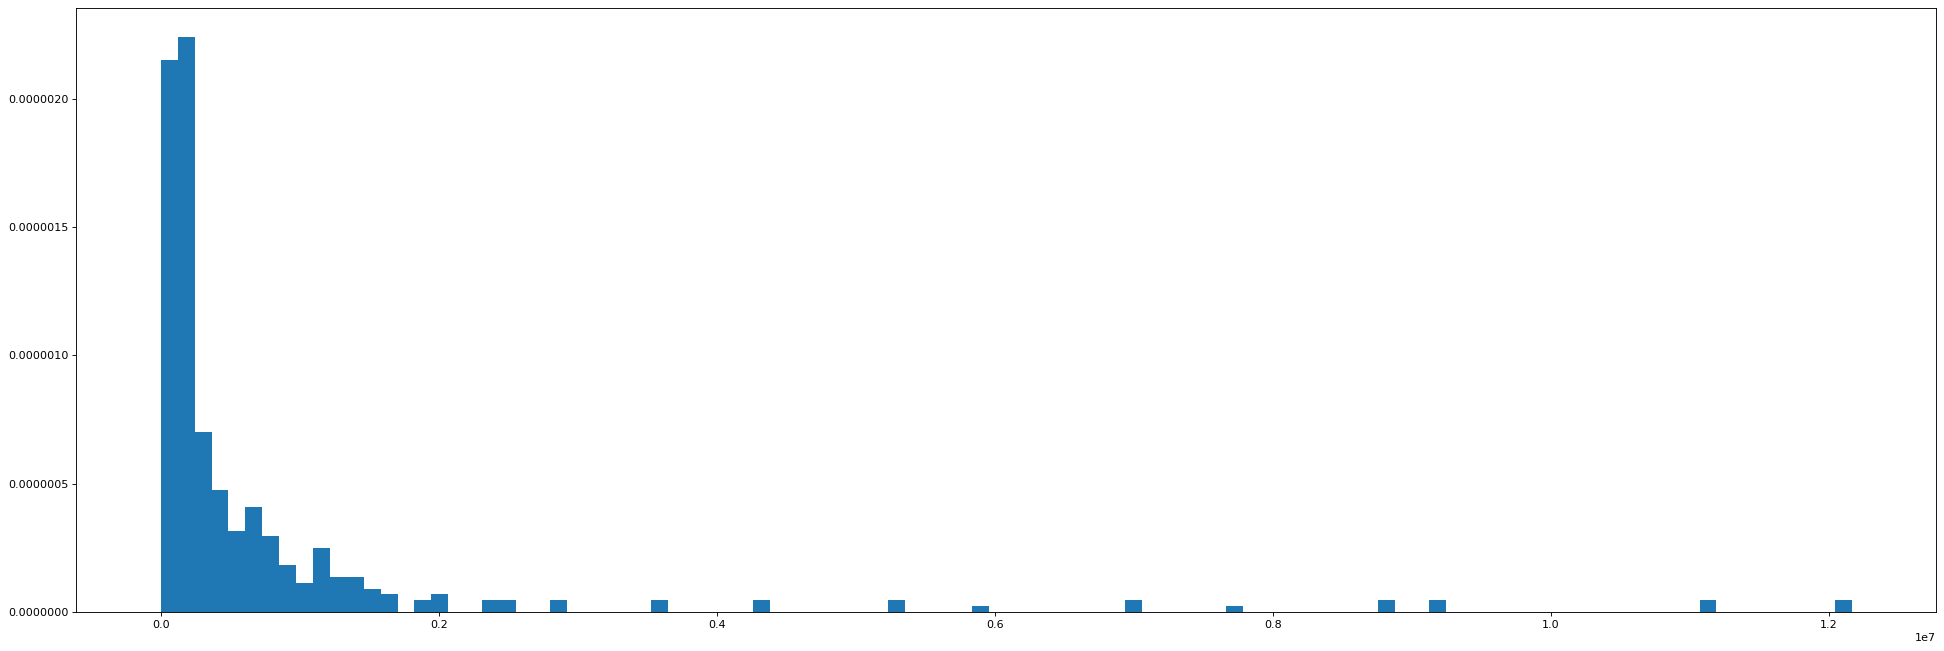

In [10]:
figure(figsize=(30, 10), dpi=80)
plt.hist(numAtPeak,density=True,bins=100)

In [42]:
PeakInfo = pd.DataFrame(columns=['Date Number','Day','Vaccine Rate', 'Number at Peak'])
PeakInfo['Date Number'] = dateOfPeak
PeakInfo['Day'] = dayOfPeak
PeakInfo['Vaccine Rate'] = vaccRate
PeakInfo['Number at Peak'] = numAtPeak
PeakDay =[]
dateOfPeak.sort()
for ix in range(len(dateOfPeak)):
    PeakDay.append(Date[dateOfPeak[ix]])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  T

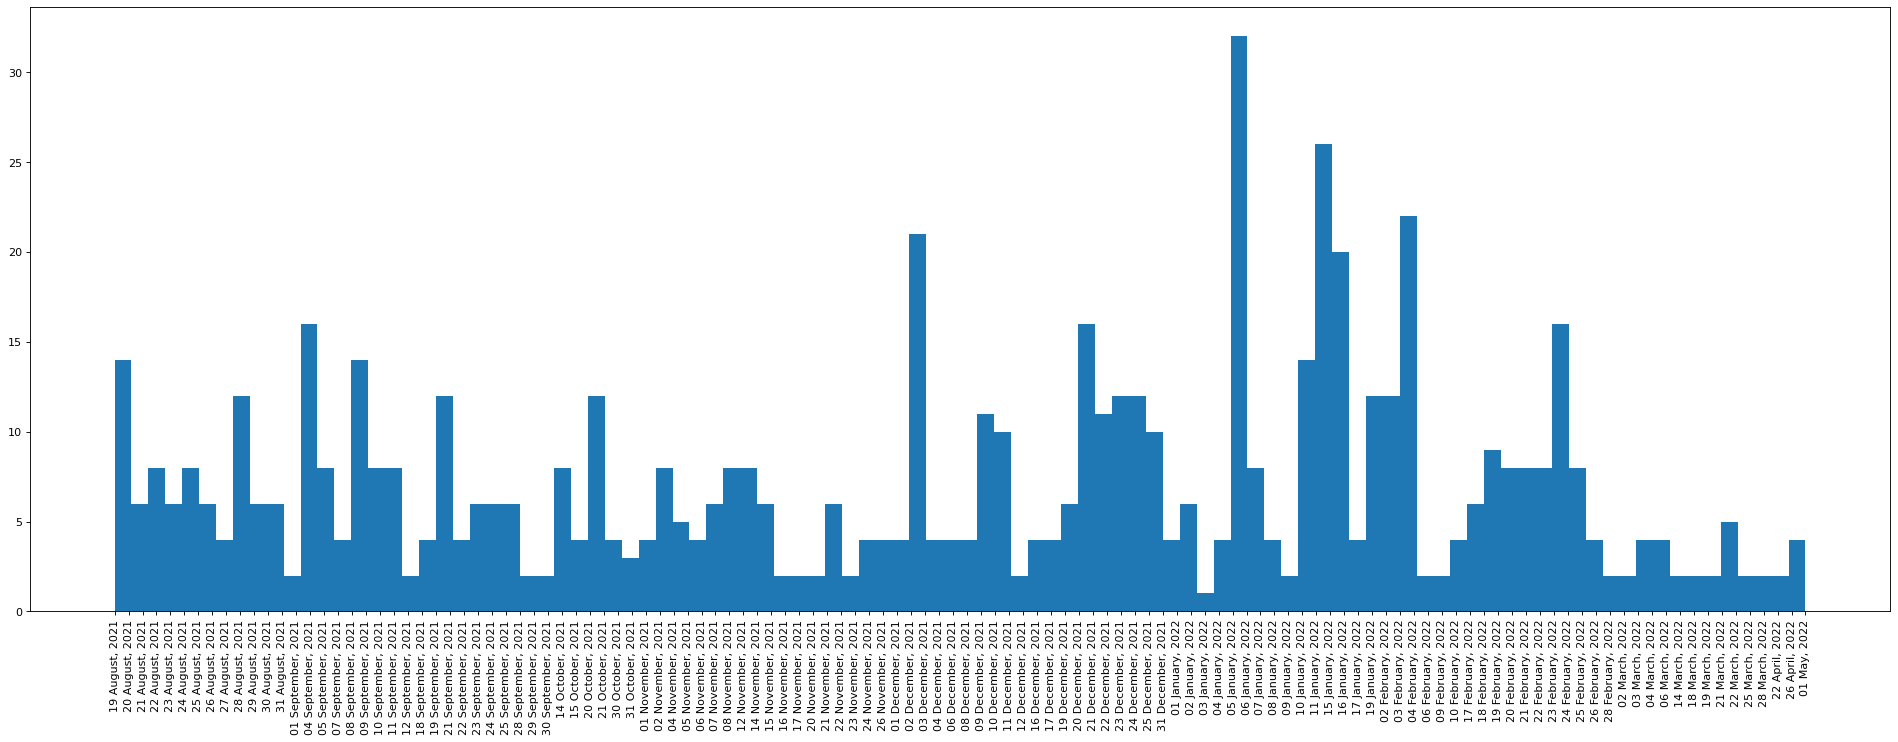

In [36]:
figure(figsize=(30, 10), dpi=80)
plt.hist(PeakDay,100)
plt.xticks(rotation=90)

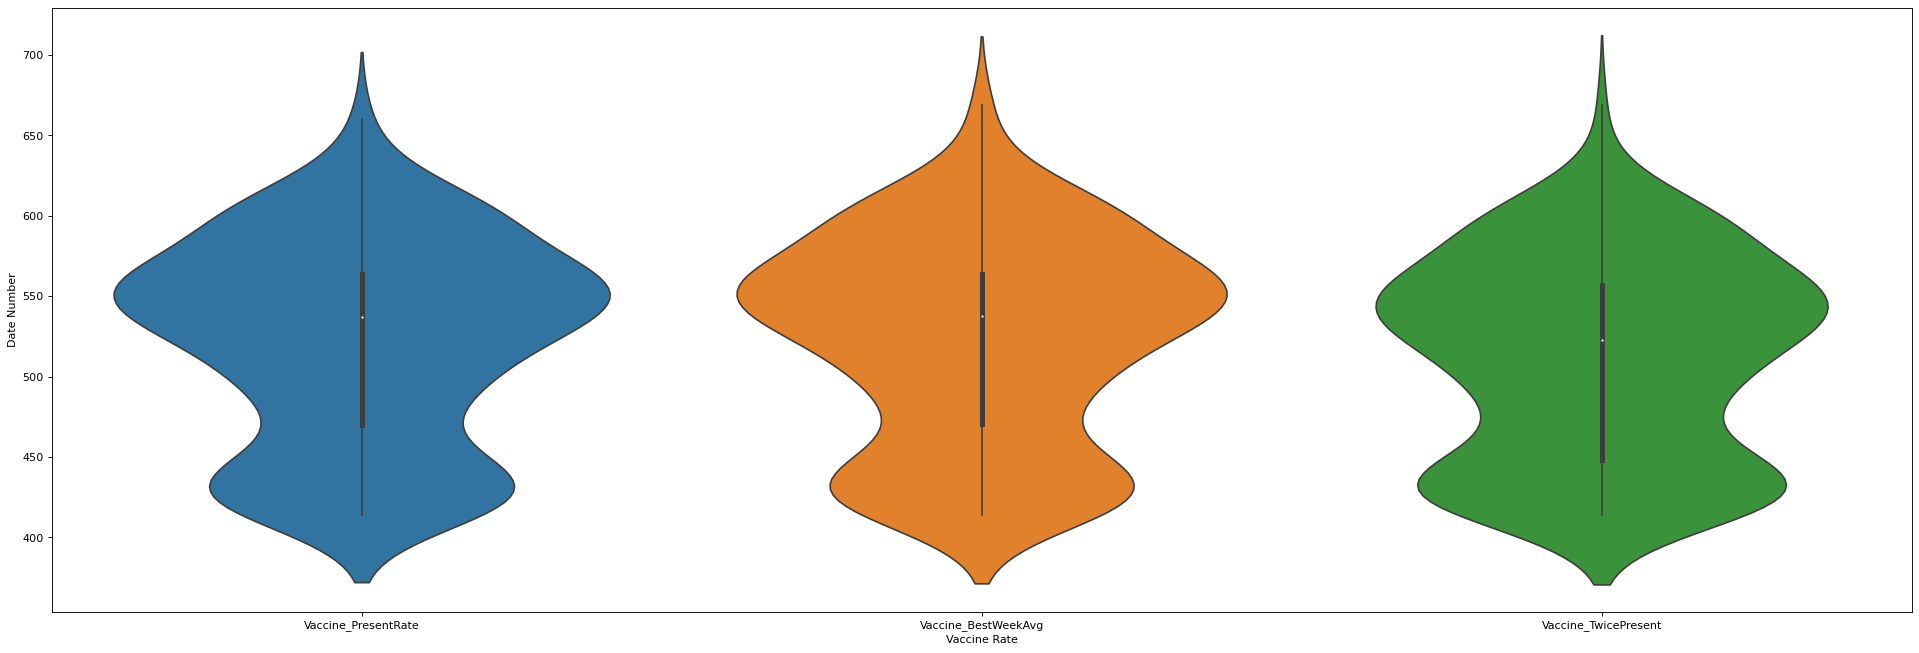

In [39]:
figure(figsize=(30, 10), dpi=80)
ax = sns.violinplot(x='Vaccine Rate', y='Date Number', data=PeakInfo)

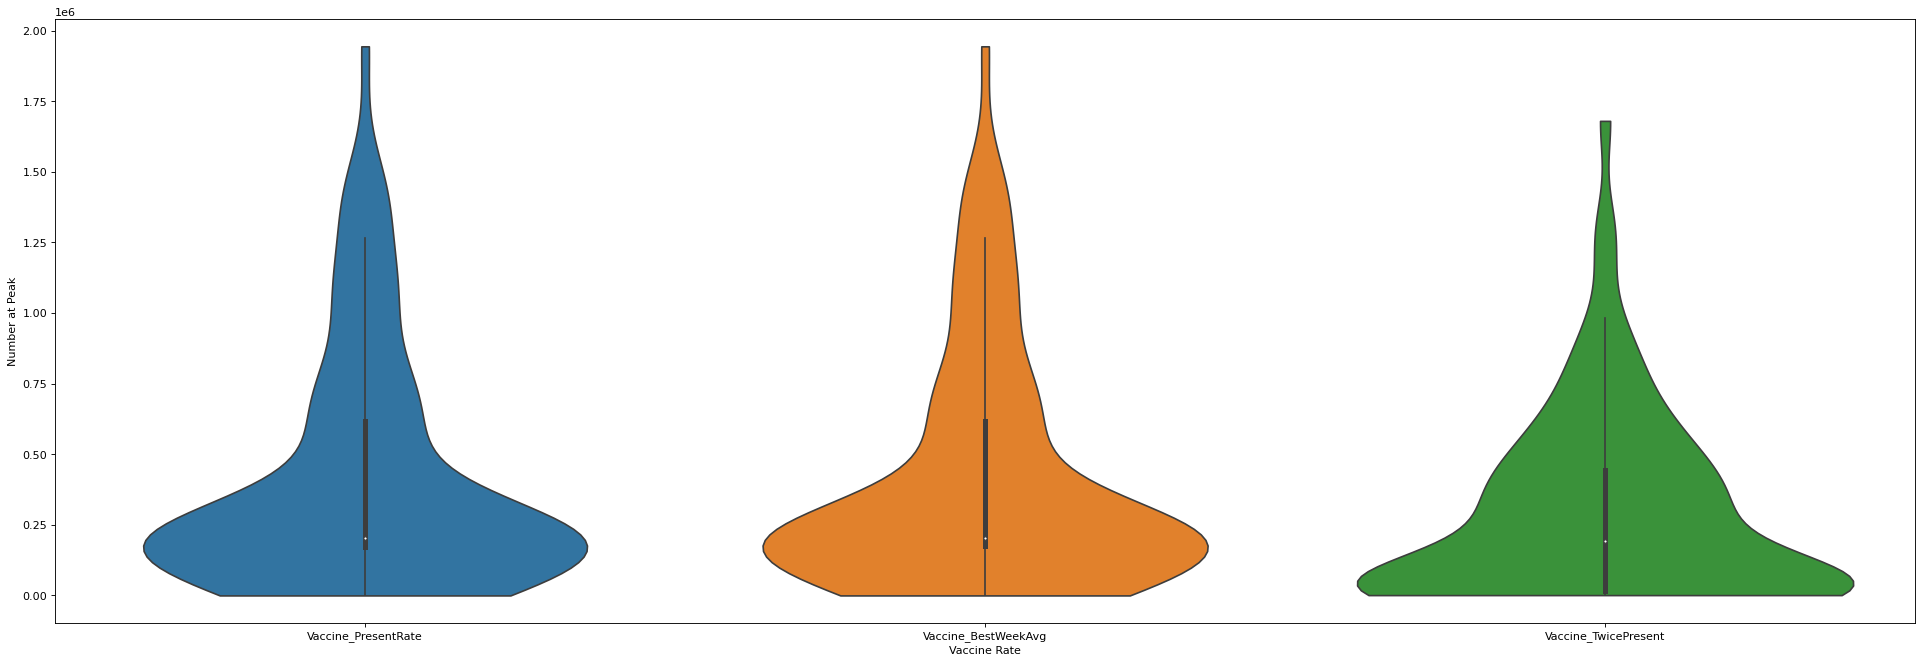

In [44]:
figure(figsize=(30, 10), dpi=80)
PeakInfo = PeakInfo.loc[PeakInfo['Number at Peak']< 2000000]
ax = sns.violinplot(x='Vaccine Rate', y='Number at Peak', data=PeakInfo,cut=0)